# Abhängigkeit der Intensität von der Spaltbreite

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [27]:
breiten = ['1','1_5','2','2_5','3','4','5','6','7']
data = {}
for i in breiten:
    data[i] = np.loadtxt('data/Spaltbreite/spaltbreite_' + i + '.dat').T 

def pix_to_nm(pixel):
    '''Umrechnung einer Pixeldifferenz in nm'''
    return pixel*3/2771.0

Die drei Lasermoden sind sichtbar. Nutzen die mittlere Lasermode, da sie die höchsten Peaks hat.

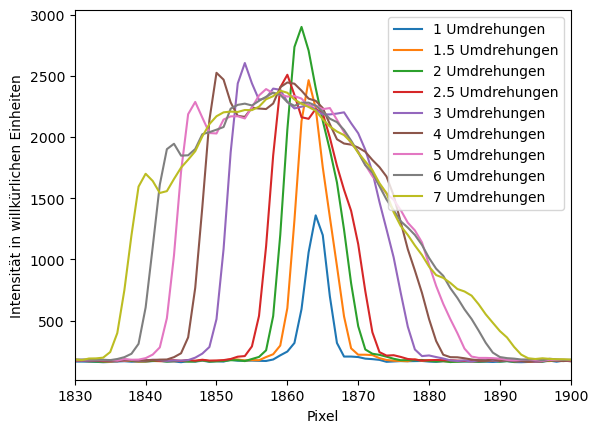

In [28]:
labels = ['1','1.5','2','2.5','3','4','5','6','7']
ax = plt.subplots()

for i,j in enumerate(breiten):
    plt.plot(data[j][0], data[j][1], label= labels[i] + ' Umdrehungen')

plt.xlim(1830,1900)

plt.xlabel('Pixel')
plt.ylabel('Intensität in willkürlichen Einheiten')
plt.legend()

Halbwertsbreiten aus dem Praktikum mittels LabView-Programm. Komme ich mit Spaltbreite in den Bereich der Wellenlänge, müssten wieder Beugungseffekte zu einer Verbreiterung führen.

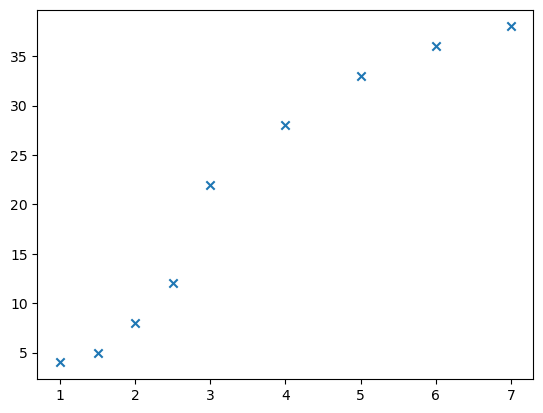

In [29]:
umdrehungen = np.array([1.,1.5,2.,2.5,3.,4.,5.,6.,7.])
untergrund = np.array([167,166,166,173,180,173,173,173,173])
fwhm = np.array([4,5,8,12,22,28,33,36,38])

ax = plt.subplots()
plt.scatter(umdrehungen, fwhm, marker='x')

Berechnung der entsprechenden Halbwertsbreiten. Ziehe den bei LabView bestimmten Untergrund ab. Wie genau Fehler machen? Nutze Funktion, da weniger Unsicherheiten als bei Bestimmung per Hand. Umrechnung von Halbwertsbreiten und Fehlern in Wellenlängen.

(3.8618992669019008, 680.0, 1695.1853448275863, 1699.0472440944882)
1
(5.403116295264681, 1232.5, 1694.8781337047353, 1700.28125)
1_5
(8.174195686227222, 1450.0, 1693.289534883721, 1701.4637305699482)
2
(12.325377543345667, 1254.5, 1684.1985195154778, 1696.5238970588234)
2_5
(22.467987115732512, 1302.5, 1671.2753164556962, 1693.7433035714287)
3
(28.441062078770756, 1262.5, 1674.7503793626706, 1703.1914414414414)
4
(34.17930029154513, 1196.0, 1671.2390670553937, 1705.4183673469388)
5
(37.069421150989456, 1181.5, 1668.1561886051081, 1705.2256097560976)
6
(39.1388340946844, 1189.5, 1664.9832589285713, 1704.1220930232557)
7


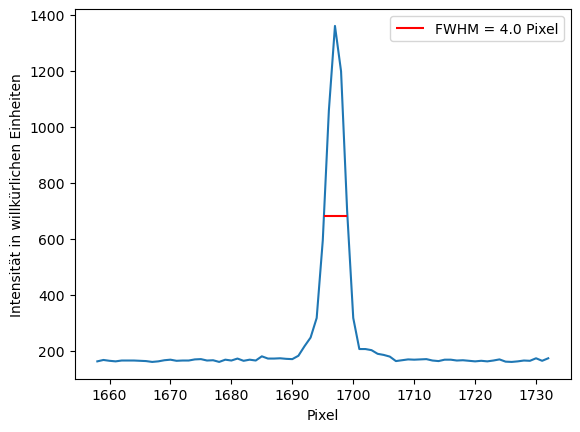

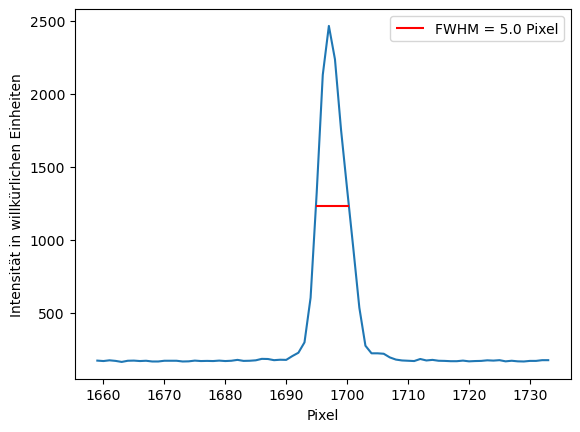

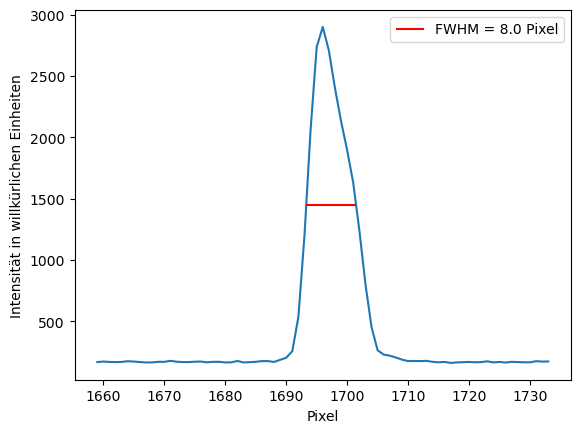

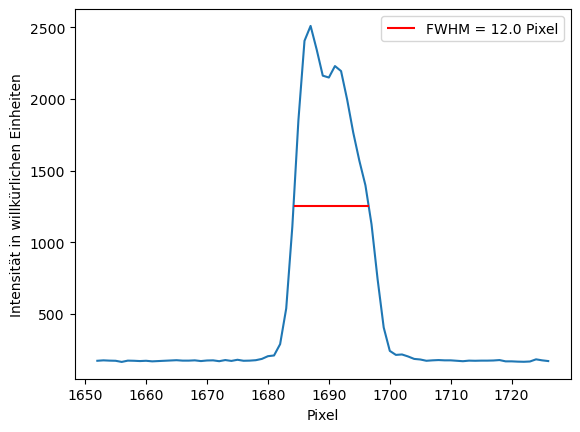

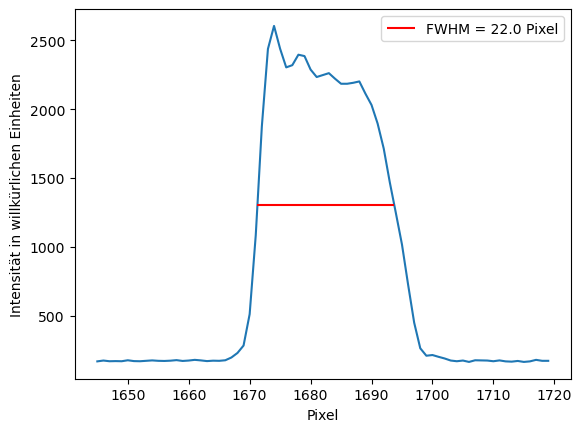

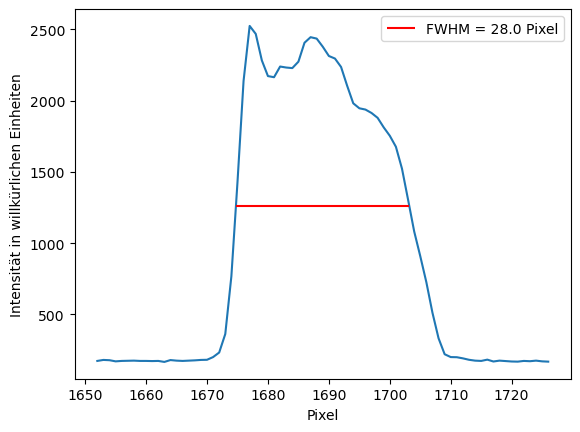

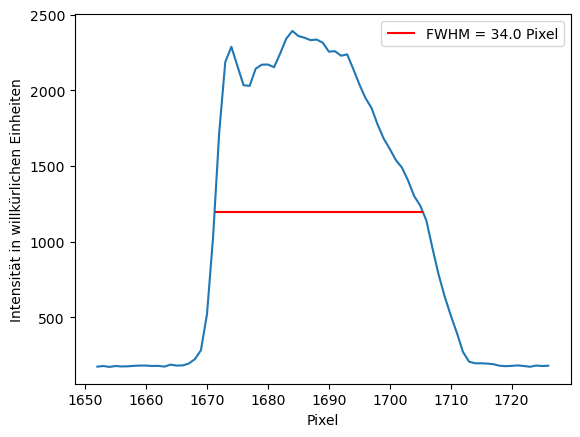

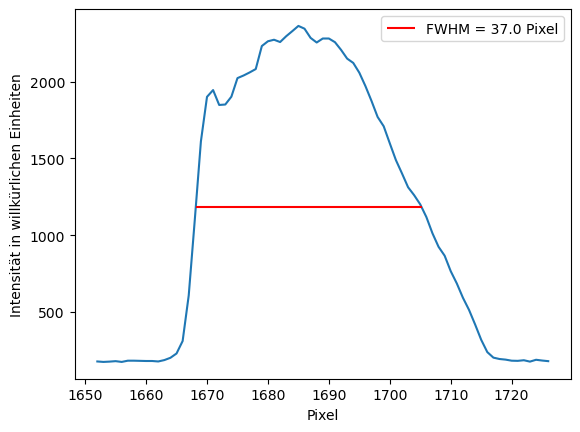

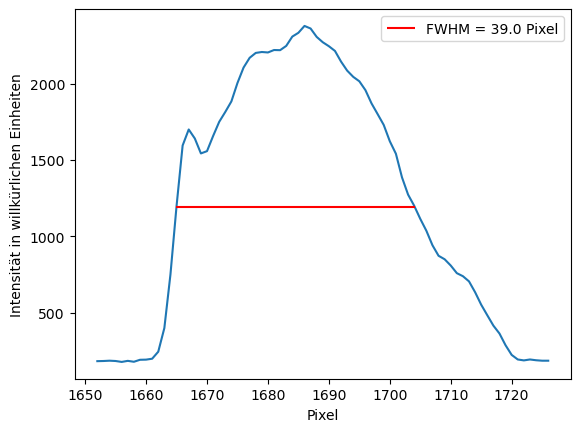

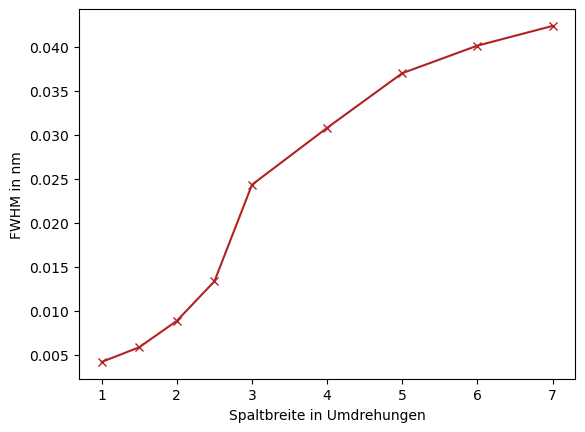

In [30]:
def get_fwhm(x,y):
    half_max = 0.5 * np.max(y)
    i = 0        
    ayuda = False
    '''Fallunterscheidung: Wird half_max getroffen wird der entsprechende
    x-Wert am Index genutzt. Wenn nicht, wird linear interpoliert.'''
    while ayuda == False:
        if y[i] == half_max:                
            ayuda = True
            x1 = x[i]
        elif y[i] >= half_max:
            ayuda = True
            m, b, r, p, se = linregress([x[i-1],x[i]],[y[i-1],y[i]])
            x1 = (half_max-b)/m
        i += 1
    ayuda = False
    while ayuda == False:
        if y[i] == half_max:
            ayuda = True
            x2 = x[i]
        elif y[i] <= half_max:
            ayuda = True
            m, b, r, p, se = linregress([x[i-1],x[i]],[y[i-1],y[i]])
            x2 = (half_max-b)/m
        i += 1
    fwhm = x2 - x1
    return fwhm, half_max, x1, x2

fwhms = []
for i,j in enumerate(breiten):
    # Schränke Daten manuell auf mittlere Lasermode ein
    range1, range2 = 1825,1900
    x = data[j][0][range1:range2] - untergrund[i]
    y = data[j][1][range1:range2]
    fwhm, half_max, xmin, xmax = get_fwhm(x,y)
    fwhms.append(fwhm)
    print(get_fwhm(x,y))
    print(j)

    ax = plt.subplots()
    plt.plot(x,y)
    plt.hlines([half_max],xmin,xmax,color='red',label='FWHM = '+str(round(fwhm,0))+' Pixel')
    plt.xlabel('Pixel')
    plt.ylabel('Intensität in willkürlichen Einheiten')
    plt.legend()
    if i == 3:
        plt.savefig('plots/example_fwhm.pdf')

fwhms = np.array(fwhms)

ax = plt.subplots()
plt.plot(umdrehungen, pix_to_nm(fwhms), marker='x',color='firebrick')
plt.xlabel('Spaltbreite in Umdrehungen')
plt.ylabel('FWHM in nm')
plt.savefig('plots/spaltbreite.pdf')